In [2]:
import pandas as pd
melbourn_data=pd.read_csv('melb_data.csv')

In [3]:
melbourn_data.describe()

,Distance,Postcode,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,20352.000000,20352.000000,20352.000000,20352.000000,20228.000000,10443.000000,12046.000000,20352.000000,20351.000000,20351.000000
mean,10.694777,3108.271669,2.967866,1.548054,1.734279,154.335528,1965.806407,-37.535531,144.997946,7333.854602
std,6.359326,101.104253,2.347998,1.041637,13.593471,624.871859,40.569849,39.049525,0.112019,4366.274540
min,0.000000,2.000000,0.000000,0.000000,0.000000,-37.771300,144.974400,-38.182550,144.431810,249.000000
25%,6.300000,3046.000000,2.000000,1.000000,1.000000,95.000000,1950.000000,-37.858800,144.927980,4217.000000
50%,9.900000,3087.000000,3.000000,1.000000,2.000000,127.000000,1970.000000,-37.802480,145.002400,6482.000000
75%,13.800000,3150.000000,4.000000,2.000000,2.000000,175.000000,2000.000000,-37.753500,145.064790,10160.000000
max,48.100000,3977.000000,308.000000,113.000000,1930.000000,44515.000000,2018.000000,5533.000000,145.526350,21650.000000


In [4]:
melbourn_data.columns
# dropna drops missing values (think of na as "not available")
melbourn_data = melbourn_data.dropna(axis=0)

In [5]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
x = melbourn_data[melbourne_features]

In [6]:
x.describe()
y=melbourn_data.Price

In [7]:
x.head()


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [8]:

from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(x,y)



DecisionTreeRegressor(random_state=1)

In [9]:
print("Making predictions for the following 5 houses:")
print(x.head())
print("The predictions are")
print(melbourne_model.predict(x.head()))
print('actual target to those houses',y.head().tolist())

Making predictions for the following 5 houses:
  Rooms  Bathroom Landsize  Lattitude  Longtitude
1     2       1.0    156.0   -37.8079    144.9934
2     3       2.0    134.0   -37.8093    144.9944
4     4       1.0    120.0   -37.8072    144.9941
6     3       2.0    245.0   -37.8024    144.9993
7     2       1.0    256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]
actual target to those houses ['1035000.0', '1465000.0', '1600000.0', '1876000.0', '1636000.0']


In [10]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(x)
mean_absolute_error(y, predicted_home_prices)

915.4328780749072

In [11]:
melbourn_data.isna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18978,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18979,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18981,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
melbourn_data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [13]:
melbourn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8713 entries, 1 to 18984
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8713 non-null   object 
 1   Address        8713 non-null   object 
 2   Rooms          8713 non-null   object 
 3   Type           8713 non-null   object 
 4   Price          8713 non-null   object 
 5   Method         8713 non-null   object 
 6   SellerG        8713 non-null   object 
 7   Date           8713 non-null   object 
 8   Distance       8713 non-null   float64
 9   Postcode       8713 non-null   float64
 10  Bedroom2       8713 non-null   float64
 11  Bathroom       8713 non-null   float64
 12  Car            8713 non-null   float64
 13  Landsize       8713 non-null   object 
 14  BuildingArea   8713 non-null   float64
 15  YearBuilt      8713 non-null   float64
 16  CouncilArea    8713 non-null   object 
 17  Lattitude      8713 non-null   float64
 18  Longtit

In [14]:
duplicate = melbourn_data.duplicated()
duplicate.shape

(8713,)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

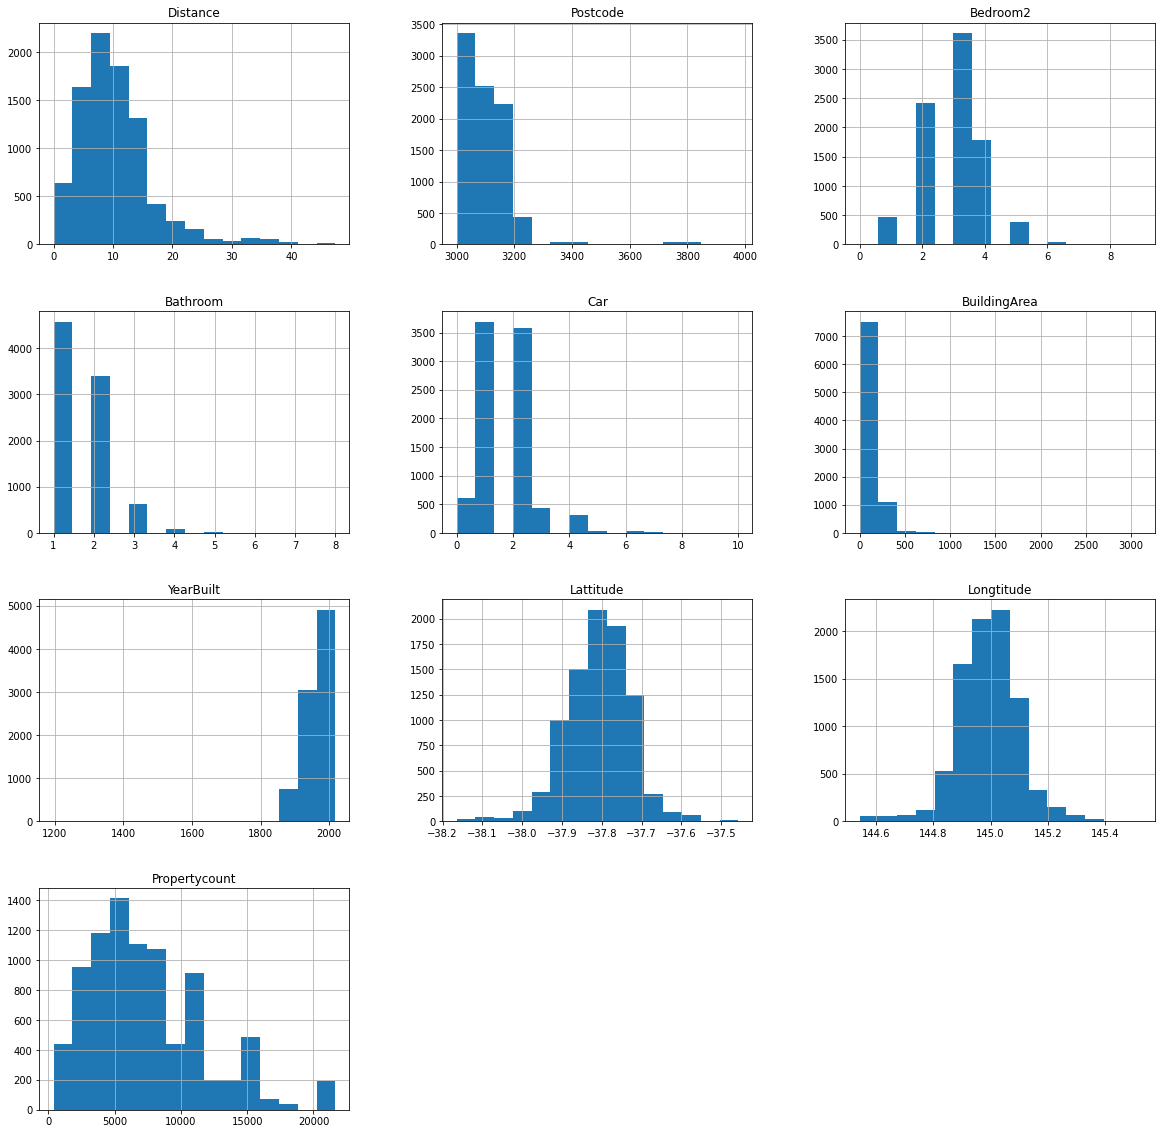

In [16]:
melbourn_data.hist(bins=15,figsize=(20,20))
plt.show()

In [17]:
melbourn_data.corr()

,Distance,Postcode,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Distance,1.000000,0.451592,0.296748,0.131802,0.272845,0.170482,0.249796,-0.102273,0.225281,-0.053056
Postcode,0.451592,1.000000,0.063546,0.111327,0.054435,0.084171,0.042812,-0.371741,0.443656,0.059481
Bedroom2,0.296748,0.063546,1.000000,0.617686,0.426637,0.605439,-0.042166,0.029402,0.078818,-0.090999
Bathroom,0.131802,0.111327,0.617686,1.000000,0.335626,0.545265,0.168581,-0.058007,0.108776,-0.052125
Car,0.272845,0.054435,0.426637,0.335626,1.000000,0.337667,0.105092,0.014768,0.050864,-0.034085
BuildingArea,0.170482,0.084171,0.605439,0.545265,0.337667,1.000000,0.020539,-0.028417,0.096175,-0.057691
YearBuilt,0.249796,0.042812,-0.042166,0.168581,0.105092,0.020539,1.000000,0.061611,-0.005835,0.002876
Lattitude,-0.102273,-0.371741,0.029402,-0.058007,0.014768,-0.028417,0.061611,1.000000,-0.368683,0.046398
Longtitude,0.225281,0.443656,0.078818,0.108776,0.050864,0.096175,-0.005835,-0.368683,1.000000,0.064089
Propertycount,-0.053056,0.059481,-0.090999,-0.052125,-0.034085,-0.057691,0.002876,0.046398,0.064089,1.000000


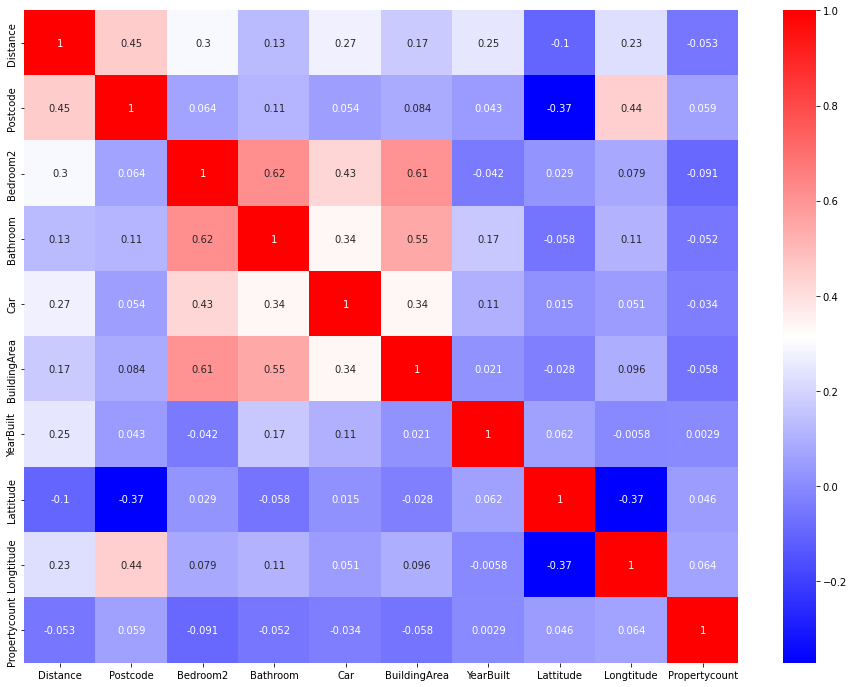

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(melbourn_data.corr(),cmap='bwr',annot=True)

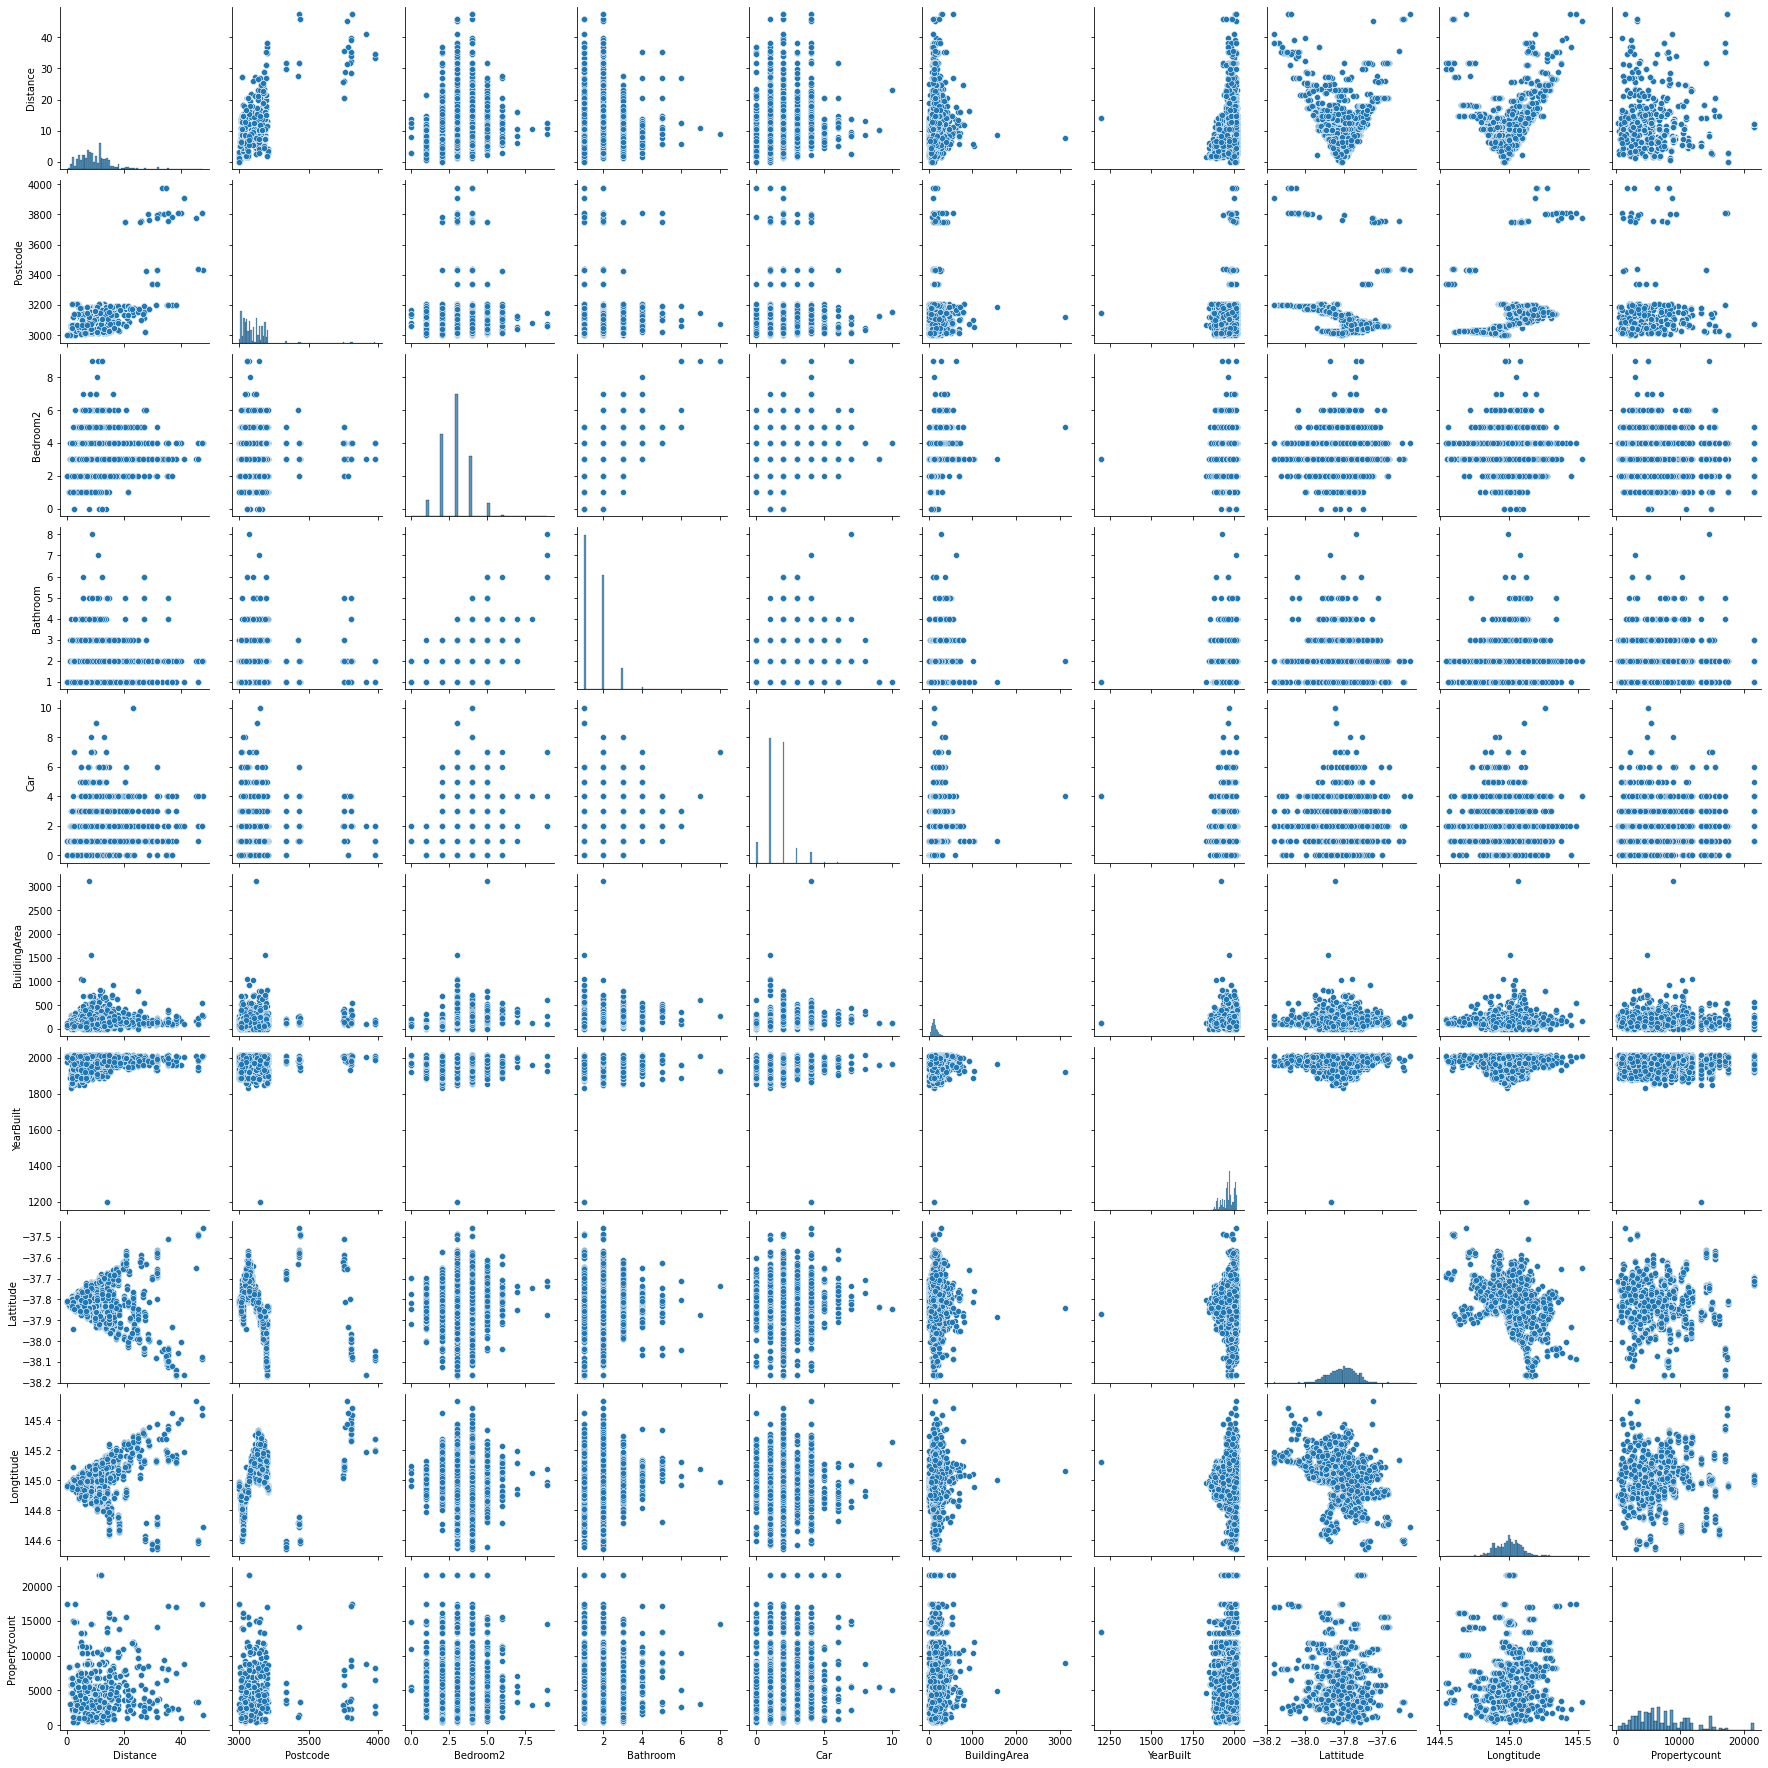

In [19]:
sns.pairplot(melbourn_data)

In [20]:
melbourn_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [22]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (6970, 5)
x_test (1743, 5)
y_train (6970,)
y_test (1743,)


In [23]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_jobs=2,random_state =0)

In [24]:
model_1.fit(x_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [25]:
y_pred= model_1.predict(x_test)

In [26]:
acc_rf = round(model_1.score(x_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [27]:
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Random Forest Classifier Accuracy: 45.09466437177281 %
